<a href="https://colab.research.google.com/github/Anh15052001/B-I-T-P-L-N-OOP/blob/main/Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
#kết nối colab với drive
from google.colab import  drive


In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
pwd


'/content'

In [20]:
cd '/content/drive/MyDrive/DeepLearning/BIENBAO/'

/content/drive/MyDrive/DeepLearning/BIENBAO


In [21]:
ls

Identification.ipynb  test.p  traffic-signs-data.zip  train.p  valid.p


In [ ]:
#lấy dữ liệu nhờ download wget
!pip install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=956b179505fd46369ad78c4c8b3ab3f8d6dc9cf6dbaecdc5e689a4e9cc0a2132
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [ ]:
link='https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip'

In [ ]:
#chúng ta cài đặt được wget phải import nó để sử dụng
import wget
wget.download(link)

'traffic-signs-data.zip'

In [23]:
#giải nén
data='./'


In [24]:
#tạo link đến các file
train_link=data+"train.p"
valid_link=data+"valid.p"
test_link=data+"test.p"

In [26]:
#đọc file nhờ pickle và with open cho lưu vào train, valid và test
import pickle
with open(train_link, mode='rb') as f:
       train=pickle.load(f)
with open(valid_link, mode='rb') as f:
       valid=pickle.load(f)
with open(test_link, mode='rb') as f:
       test=pickle.load(f)

        

In [27]:
#xây dựng dữ liệu tập train_X, nhãn train, valid feature và nhãn
#tập các featute
train_X=train["features"]
train_y=train["labels"]
valid_X=valid["features"]
valid_y=valid["labels"]
test_X=test["features"]
test_y=test["labels"]

In [28]:
#xem kích thước số ảnh số cột của tập dữ lịu
print(train_X.shape)
print(train_y.shape)
print(valid_X.shape)
print(valid_y.shape)
print(test_X.shape)
print(test_y.shape)

(34799, 32, 32, 3)
(34799,)
(4410, 32, 32, 3)
(4410,)
(12630, 32, 32, 3)
(12630,)


0


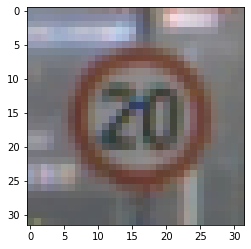

In [29]:
#hiển thị 1 vài ảnh
import matplotlib.pyplot as plt
plt.imshow(train_X[10000])
print(train_y[10000])

In [30]:
classNames = {0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go straight or right',
 37: 'Go straight or left',
 38: 'Keep right',
 39: 'Keep left',
 40: 'Roundabout mandatory',
 41: 'End of no passing',
 42: 'End of no passing by vehicles over 3.5 metric tons'}

In [31]:
from sklearn.utils import shuffle
train_X, train_y=shuffle(train_X, train_y)

In [32]:
#chuẩn hóa feature về dạng datapoint
train_X=train_X.astype("float")/255.0
valid_X=valid_X.astype("float")/255.0
test_X=test_X.astype("float")/255.0

In [33]:
#chuẩn hóa one hot encoding về dạng vector
from sklearn.preprocessing import LabelBinarizer
lb=LabelBinarizer()
train_y=lb.fit_transform(train_y)
valid_y=lb.fit_transform(valid_y)
test_y=lb.fit_transform(test_y)

In [34]:
#Xây dựng mô hình đầu vào là ảnh 32x32x3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout

In [35]:
#khởi tạo 1 mô hình tuần tự
model=Sequential()
#Block1
#lớp Con2D tăng độ dày, trích xuất các đặc trưng của ảnh
#càng nhiều Con2D mô hình càng học được nhiều các đặc trưng của ảnh
model.add(Conv2D(32, (3, 3), padding="same", input_shape=(32,32,3)))
#cho đầu ra 32x32x32
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
#thêm 1 lớp MaxPooling giảm kích thước ảnh đi 1 nửa những vẫn giữ được độ dày
 

In [38]:
#đầu ra 16x16x32
#cho độ dày lên 64 trích xuất thêm các đặc trưng ảnh
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
#giảm kích thước đi 1 nửa vẫn giữ nguyên độ dày
model.add(MaxPooling2D(pool_size=(2, 2)))
#đầu ra 8x8x64 => duỗi ra vector 4096x1


In [39]:
model.add(Flatten())
#vector 4096x1
model.add(Dense(512, activation='relu'))
model.add(Dense(43, activation='softmax'))


In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                        

In [41]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import concatenate


In [44]:
#tăng cường data
aug=ImageDataGenerator(rotation_range=0.18, zoom_range=0.15, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)
#xác định hàm tối ưu để biên dịch
opt=SGD(learning_rate=0.01, momentum=0.9)
#thực hiện biên dịch
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])



In [45]:
#thực hiện huấn luyện 
print("Trainning.....")
H=model.fit_generator(aug.flow(train_X, train_y), validation_data=(valid_X, valid_y), steps_per_epoch=train_X.shape[0]//64, epochs=10, verbose=1)

Trainning.....


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/10
543/543 [==============================] - 218s 398ms/step - loss: 2.7592 - accuracy: 0.2379 - val_loss: 3.7543 - val_accuracy: 0.2351
Epoch 2/10
543/543 [==============================] - 216s 397ms/step - loss: 1.4650 - accuracy: 0.5357 - val_loss: 1.4401 - val_accuracy: 0.5610
Epoch 3/10
543/543 [==============================] - 216s 397ms/step - loss: 0.9369 - accuracy: 0.6815 - val_loss: 1.1169 - val_accuracy: 0.6995
Epoch 4/10
543/543 [==============================] - 216s 397ms/step - loss: 0.6315 - accuracy: 0.7871 - val_loss: 0.9555 - val_accuracy: 0.7311
Epoch 5/10
543/543 [==============================] - 215s 396ms/step - loss: 0.4776 - accuracy: 0.8383 - val_loss: 1.0258 - val_accuracy: 0.7213
Epoch 6/10
543/543 [==============================] - 214s 395ms/step - loss: 0.3621 - accuracy: 0.8768 - val_loss: 1.0836 - val_accuracy: 0.7220
Epoch 7/10
543/543 [==============================] - 215s 396ms/step - loss: 0.2943 - accuracy: 0.8982 - val_loss: 0.9417 -

8
Speed limit (120km/h)


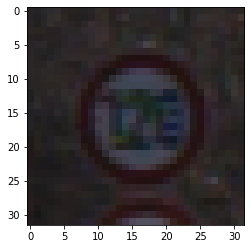

In [67]:

plt.imshow(test_X[320])
import numpy as np
y_predict=model.predict(test_X[320:321])
y_predict=np.argmax(y_predict)
print(y_predict)
print(classNames[y_predict])